In [13]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import warnings
warnings.filterwarnings('ignore')

def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    os.environ['PYTHONHASHSEED'] = str(seed)
    
seed_everything(seed=42)

In [2]:
train = pd.read_csv('train_pca_var.csv')
test = pd.read_csv('test_pca_var.csv')

print(train.shape, test.shape)

(2828, 114) (939, 113)


In [3]:
X_train = train.drop(['Culture'], axis=1)
y_train = train['Culture']-1

X_test = test.copy()#drop(['0','1','2'], axis=1)

In [4]:
y_train

0        3
1       16
2        1
3        3
4        3
        ..
2823     3
2824     3
2825     3
2826     4
2827     6
Name: Culture, Length: 2828, dtype: int64

In [5]:
class Model(nn.Module):
    def __init__(self, num_features, num_targets, hidden_size):
        super(Model, self).__init__()
        self.batch_norm1 = nn.BatchNorm1d(num_features)
        self.dropout1 = nn.Dropout(0.2)
        self.dense1 = nn.utils.weight_norm(nn.Linear(num_features, 1130))
        
        self.batch_norm2 = nn.BatchNorm1d(1130)
        self.dropout2 = nn.Dropout(0.2)
        self.dense2 = nn.utils.weight_norm(nn.Linear(1130, hidden_size))
        
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(0.2)
        self.dense3 = nn.utils.weight_norm(nn.Linear(hidden_size, hidden_size))
        
        self.batch_norm4 = nn.BatchNorm1d(hidden_size)
        self.dropout4 = nn.Dropout(0.4)
        self.dense4 = nn.Linear(hidden_size, num_targets)
    
    def forward(self, x):
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = F.relu(self.dense1(x))
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = F.relu(self.dense2(x))
        
        x = self.batch_norm3(x)
        x = self.dropout3(x)
        x = self.dense3(x)
        
        x = self.batch_norm4(x)
        x = self.dropout4(x)
        x = self.dense4(x)
        
        return x

In [6]:
class MoADataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        
        return self.features[idx],self.targets[idx]
    
class TestDataset(Dataset):
    def __init__(self, features):
        self.features = features
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        return self.features[idx]

In [30]:
EPOCHS = 50
BATCH_SIZE = 512
#LEARNING_RATE = 0.00007

num_features=113
num_targets=len(y_train)
hidden_size=1024


Begin training.


Epoch 001: | Train Loss: 6.56513 | Val Loss: 7.06955
Epoch 002: | Train Loss: 2.89929 | Val Loss: 4.15099
Epoch 003: | Train Loss: 1.97862 | Val Loss: 2.42729
Epoch 004: | Train Loss: 1.46052 | Val Loss: 2.11159
Epoch 005: | Train Loss: 1.23396 | Val Loss: 1.98493
Epoch 006: | Train Loss: 1.01638 | Val Loss: 2.03711
Epoch 007: | Train Loss: 0.81948 | Val Loss: 1.88670
Epoch 008: | Train Loss: 0.64707 | Val Loss: 1.66709
Epoch 009: | Train Loss: 0.56339 | Val Loss: 1.51093
Epoch 010: | Train Loss: 0.41058 | Val Loss: 1.34994
Epoch 011: | Train Loss: 0.39130 | Val Loss: 1.23081
Epoch 012: | Train Loss: 0.32168 | Val Loss: 1.16364
Epoch 013: | Train Loss: 0.28559 | Val Loss: 1.11141
Epoch 014: | Train Loss: 0.23623 | Val Loss: 1.08854
Epoch 015: | Train Loss: 0.22832 | Val Loss: 1.02456
Epoch 016: | Train Loss: 0.19605 | Val Loss: 1.00268
Epoch 017: | Train Loss: 0.16537 | Val Loss: 0.97169
Epoch 018: | Train Loss: 0.17680 | Val Loss: 0.92606
Epoch 019: | Train Loss: 0.16246 | Val Loss: 0

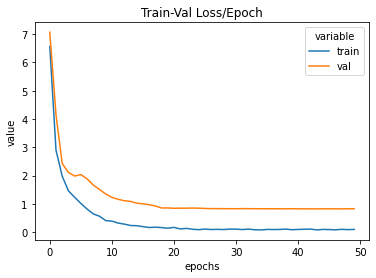

0.8728733697117085
Begin training.


Epoch 001: | Train Loss: 6.56762 | Val Loss: 7.06650
Epoch 002: | Train Loss: 2.74889 | Val Loss: 4.18894
Epoch 003: | Train Loss: 1.80419 | Val Loss: 2.23746
Epoch 004: | Train Loss: 1.40110 | Val Loss: 1.92951
Epoch 005: | Train Loss: 1.17103 | Val Loss: 1.83649
Epoch 006: | Train Loss: 1.00229 | Val Loss: 1.85001
Epoch 007: | Train Loss: 0.79434 | Val Loss: 1.75512
Epoch 008: | Train Loss: 0.64162 | Val Loss: 1.61330
Epoch 009: | Train Loss: 0.49253 | Val Loss: 1.51044
Epoch 010: | Train Loss: 0.42698 | Val Loss: 1.38479
Epoch 011: | Train Loss: 0.39976 | Val Loss: 1.26939
Epoch 012: | Train Loss: 0.32250 | Val Loss: 1.17300
Epoch 013: | Train Loss: 0.29529 | Val Loss: 1.13855
Epoch 014: | Train Loss: 0.23647 | Val Loss: 1.09556
Epoch 015: | Train Loss: 0.23832 | Val Loss: 1.03841
Epoch 016: | Train Loss: 0.19419 | Val Loss: 0.96615
Epoch 017: | Train Loss: 0.20747 | Val Loss: 0.93885
Epoch 018: | Train Loss: 0.16338 | Val Loss: 0.90547
Epoch 019: | Train Loss: 0.13872 | Val Loss: 0

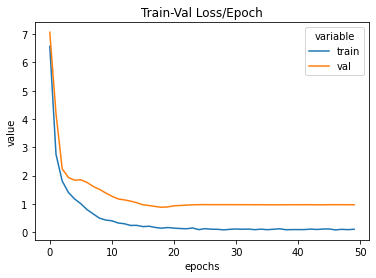

0.8666382035358561
Begin training.


Epoch 001: | Train Loss: 6.51482 | Val Loss: 7.04219
Epoch 002: | Train Loss: 2.89042 | Val Loss: 3.97487
Epoch 003: | Train Loss: 1.84484 | Val Loss: 2.21129
Epoch 004: | Train Loss: 1.38231 | Val Loss: 1.95800
Epoch 005: | Train Loss: 1.18362 | Val Loss: 1.99912
Epoch 006: | Train Loss: 0.99152 | Val Loss: 2.08351
Epoch 007: | Train Loss: 0.76769 | Val Loss: 2.05139
Epoch 008: | Train Loss: 0.61001 | Val Loss: 1.92704
Epoch 009: | Train Loss: 0.52075 | Val Loss: 1.75737
Epoch 010: | Train Loss: 0.42693 | Val Loss: 1.58051
Epoch 011: | Train Loss: 0.39869 | Val Loss: 1.51410
Epoch 012: | Train Loss: 0.29873 | Val Loss: 1.54113
Epoch 013: | Train Loss: 0.29843 | Val Loss: 1.51247
Epoch 014: | Train Loss: 0.23961 | Val Loss: 1.45679
Epoch 015: | Train Loss: 0.23969 | Val Loss: 1.35128
Epoch 016: | Train Loss: 0.18067 | Val Loss: 1.21323
Epoch 017: | Train Loss: 0.17547 | Val Loss: 1.09535
Epoch 018: | Train Loss: 0.15428 | Val Loss: 1.10619
Epoch 019: | Train Loss: 0.16693 | Val Loss: 1

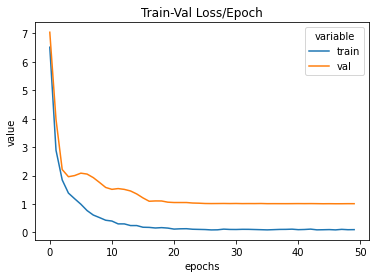

0.8614604410965399
Begin training.


Epoch 001: | Train Loss: 6.42510 | Val Loss: 6.95560
Epoch 002: | Train Loss: 2.77921 | Val Loss: 3.67703
Epoch 003: | Train Loss: 1.90025 | Val Loss: 2.05918
Epoch 004: | Train Loss: 1.43145 | Val Loss: 1.69709
Epoch 005: | Train Loss: 1.19926 | Val Loss: 1.55631
Epoch 006: | Train Loss: 0.98462 | Val Loss: 1.63439
Epoch 007: | Train Loss: 0.80734 | Val Loss: 1.41133
Epoch 008: | Train Loss: 0.58422 | Val Loss: 1.18116
Epoch 009: | Train Loss: 0.48576 | Val Loss: 1.08622
Epoch 010: | Train Loss: 0.41815 | Val Loss: 1.08793
Epoch 011: | Train Loss: 0.33820 | Val Loss: 0.89818
Epoch 012: | Train Loss: 0.30222 | Val Loss: 0.82067
Epoch 013: | Train Loss: 0.28340 | Val Loss: 0.83429
Epoch 014: | Train Loss: 0.22689 | Val Loss: 0.85201
Epoch 015: | Train Loss: 0.21893 | Val Loss: 0.78618
Epoch 016: | Train Loss: 0.19710 | Val Loss: 0.73154
Epoch 017: | Train Loss: 0.17199 | Val Loss: 0.74210
Epoch 018: | Train Loss: 0.15318 | Val Loss: 0.74602
Epoch 019: | Train Loss: 0.14907 | Val Loss: 0

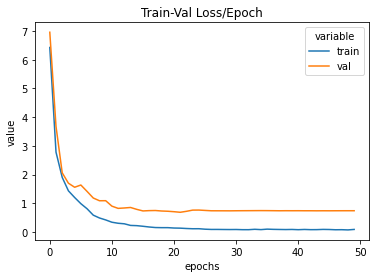

0.8786830048642893
Begin training.


Epoch 001: | Train Loss: 6.37050 | Val Loss: 6.99957
Epoch 002: | Train Loss: 2.80983 | Val Loss: 4.00505
Epoch 003: | Train Loss: 1.88854 | Val Loss: 2.19058
Epoch 004: | Train Loss: 1.43362 | Val Loss: 1.87341
Epoch 005: | Train Loss: 1.20487 | Val Loss: 1.77791
Epoch 006: | Train Loss: 0.95226 | Val Loss: 1.84727
Epoch 007: | Train Loss: 0.82014 | Val Loss: 1.74586
Epoch 008: | Train Loss: 0.65438 | Val Loss: 1.55469
Epoch 009: | Train Loss: 0.49661 | Val Loss: 1.45072
Epoch 010: | Train Loss: 0.42230 | Val Loss: 1.48869
Epoch 011: | Train Loss: 0.40634 | Val Loss: 1.34515
Epoch 012: | Train Loss: 0.33093 | Val Loss: 1.23197
Epoch 013: | Train Loss: 0.27922 | Val Loss: 1.09898
Epoch 014: | Train Loss: 0.28423 | Val Loss: 1.09992
Epoch 015: | Train Loss: 0.22117 | Val Loss: 0.97935
Epoch 016: | Train Loss: 0.21343 | Val Loss: 0.90211
Epoch 017: | Train Loss: 0.16896 | Val Loss: 0.83422
Epoch 018: | Train Loss: 0.17483 | Val Loss: 0.81189
Epoch 019: | Train Loss: 0.16893 | Val Loss: 0

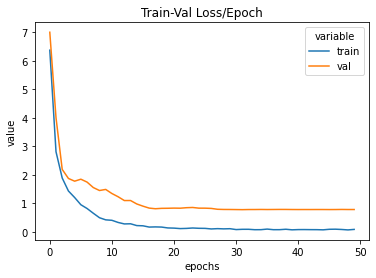

0.8665538830467198


In [37]:
LEARNING_RATE=0.0007
from torch.optim.lr_scheduler import ReduceLROnPlateau
test_dataset = TestDataset(torch.from_numpy(X_test.values).float())
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE)
final_preds=pd.DataFrame()
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=31)
qwe=0
for train_index, test_index in skf.split(X_train, y_train):
  loss_stats = {
    'train': [],
    "val": []
  }
  f1_stats=[]
  x_tt, x_tv = X_train.loc[train_index,:], X_train.loc[test_index,:]
  y_tt, y_tv = y_train[train_index], y_train[test_index]
  train_dataset = MoADataset(torch.from_numpy(x_tt.values).float(), torch.from_numpy(y_tt.values))
  val_dataset = MoADataset(torch.from_numpy(x_tv.values).float(), torch.from_numpy(y_tv.values))
  train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
  val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE)
  model = Model(num_features, num_targets, hidden_size)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  scheduler=ReduceLROnPlateau(optimizer, 'min',factor=0.3,patience=5)
  print("Begin training.")
  for e in tqdm(range(1, EPOCHS+1)):

    
      # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
      optimizer.zero_grad()
        
      y_train_pred = model(X_train_batch)
       
      train_loss = criterion(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
      val_epoch_loss = 0
      model.eval()
      for X_val_batch, y_val_batch in val_loader:
        y_val_pred = model(X_val_batch)
                        
        val_loss = criterion(y_val_pred, y_val_batch)
        
        scheduler.step(val_loss)
        val_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')
  train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
  sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')
  plt.show()  
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch,_  in val_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  print(f1_score(preds,y_tv.values , average='weighted'))
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch in test_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  final_preds['preds'+str(qwe)]=pd.Series(preds)
  qwe+=1

In [42]:
preds=[]
check_it=[]
for i in range(len(final_preds)):
    preds.append(final_preds.loc[i].value_counts().index.tolist()[0])
    #try:
    #    if preds.loc[i].value_counts()[:1].

In [46]:
final_preds['final']=pd.Series(preds)+1

Begin training.


Epoch 001: | Train Loss: 5.89384 | Val Loss: 6.38663
Epoch 002: | Train Loss: 2.27662 | Val Loss: 3.02478
Epoch 003: | Train Loss: 1.63090 | Val Loss: 2.08875
Epoch 004: | Train Loss: 1.22832 | Val Loss: 1.91682
Epoch 005: | Train Loss: 0.92771 | Val Loss: 1.95765
Epoch 006: | Train Loss: 0.66455 | Val Loss: 1.82043
Epoch 007: | Train Loss: 0.61117 | Val Loss: 1.57116
Epoch 008: | Train Loss: 0.47765 | Val Loss: 1.37275
Epoch 009: | Train Loss: 0.36096 | Val Loss: 1.30441
Epoch 010: | Train Loss: 0.31162 | Val Loss: 1.26242
Epoch 011: | Train Loss: 0.24534 | Val Loss: 1.18642
Epoch 012: | Train Loss: 0.23275 | Val Loss: 1.15075
Epoch 013: | Train Loss: 0.22159 | Val Loss: 1.09162
Epoch 014: | Train Loss: 0.17651 | Val Loss: 1.17007
Epoch 015: | Train Loss: 0.16544 | Val Loss: 1.15211
Epoch 016: | Train Loss: 0.16287 | Val Loss: 1.09450
Epoch 017: | Train Loss: 0.17824 | Val Loss: 1.10045
Epoch 018: | Train Loss: 0.14469 | Val Loss: 1.16195
Epoch 019: | Train Loss: 0.11401 | Val Loss: 1

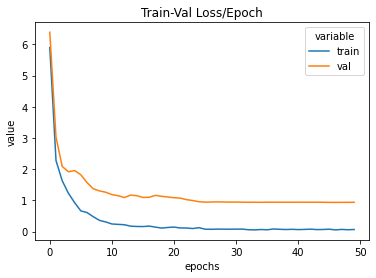

0.8880773861254024
Begin training.


Epoch 001: | Train Loss: 5.96915 | Val Loss: 6.44780
Epoch 002: | Train Loss: 2.22673 | Val Loss: 2.95455
Epoch 003: | Train Loss: 1.57881 | Val Loss: 2.00895
Epoch 004: | Train Loss: 1.15139 | Val Loss: 1.89149
Epoch 005: | Train Loss: 0.87041 | Val Loss: 1.90617
Epoch 006: | Train Loss: 0.71241 | Val Loss: 1.77342
Epoch 007: | Train Loss: 0.58665 | Val Loss: 1.70434
Epoch 008: | Train Loss: 0.45673 | Val Loss: 1.57977
Epoch 009: | Train Loss: 0.36971 | Val Loss: 1.49303
Epoch 010: | Train Loss: 0.31600 | Val Loss: 1.40955
Epoch 011: | Train Loss: 0.27628 | Val Loss: 1.27681
Epoch 012: | Train Loss: 0.24998 | Val Loss: 1.16205
Epoch 013: | Train Loss: 0.22502 | Val Loss: 1.07285
Epoch 014: | Train Loss: 0.19840 | Val Loss: 1.05324
Epoch 015: | Train Loss: 0.20070 | Val Loss: 1.06753
Epoch 016: | Train Loss: 0.17247 | Val Loss: 1.01122
Epoch 017: | Train Loss: 0.15538 | Val Loss: 0.91727
Epoch 018: | Train Loss: 0.15418 | Val Loss: 0.85420
Epoch 019: | Train Loss: 0.12343 | Val Loss: 0

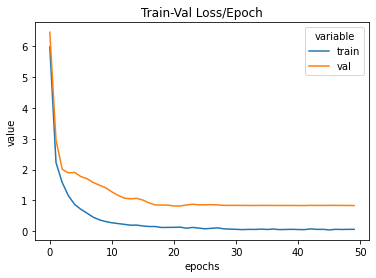

0.8809234210614093
Begin training.


Epoch 001: | Train Loss: 5.96604 | Val Loss: 6.35644
Epoch 002: | Train Loss: 2.22479 | Val Loss: 2.83457
Epoch 003: | Train Loss: 1.52189 | Val Loss: 2.04067
Epoch 004: | Train Loss: 1.14230 | Val Loss: 2.06504
Epoch 005: | Train Loss: 0.96014 | Val Loss: 2.13645
Epoch 006: | Train Loss: 0.69588 | Val Loss: 2.01320
Epoch 007: | Train Loss: 0.59307 | Val Loss: 1.89308
Epoch 008: | Train Loss: 0.43044 | Val Loss: 1.78060
Epoch 009: | Train Loss: 0.40100 | Val Loss: 1.62379
Epoch 010: | Train Loss: 0.30232 | Val Loss: 1.48264
Epoch 011: | Train Loss: 0.23540 | Val Loss: 1.37111
Epoch 012: | Train Loss: 0.22759 | Val Loss: 1.26926
Epoch 013: | Train Loss: 0.19356 | Val Loss: 1.23633
Epoch 014: | Train Loss: 0.21855 | Val Loss: 1.21378
Epoch 015: | Train Loss: 0.17736 | Val Loss: 1.11484
Epoch 016: | Train Loss: 0.17199 | Val Loss: 1.06125
Epoch 017: | Train Loss: 0.13658 | Val Loss: 1.05516
Epoch 018: | Train Loss: 0.12149 | Val Loss: 1.00732
Epoch 019: | Train Loss: 0.12609 | Val Loss: 0

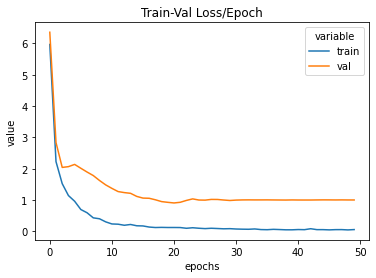

0.8720587479874851
Begin training.


Epoch 001: | Train Loss: 6.04709 | Val Loss: 6.36713
Epoch 002: | Train Loss: 2.33650 | Val Loss: 2.81866
Epoch 003: | Train Loss: 1.51770 | Val Loss: 1.71279
Epoch 004: | Train Loss: 1.22956 | Val Loss: 1.51289
Epoch 005: | Train Loss: 0.84525 | Val Loss: 1.55382
Epoch 006: | Train Loss: 0.65382 | Val Loss: 1.24402
Epoch 007: | Train Loss: 0.53056 | Val Loss: 1.10171
Epoch 008: | Train Loss: 0.42027 | Val Loss: 1.04020
Epoch 009: | Train Loss: 0.32336 | Val Loss: 1.01409
Epoch 010: | Train Loss: 0.33433 | Val Loss: 0.90912
Epoch 011: | Train Loss: 0.26681 | Val Loss: 0.97746
Epoch 012: | Train Loss: 0.21218 | Val Loss: 0.86922
Epoch 013: | Train Loss: 0.17955 | Val Loss: 0.89267
Epoch 014: | Train Loss: 0.17276 | Val Loss: 0.86193
Epoch 015: | Train Loss: 0.18116 | Val Loss: 0.86124
Epoch 016: | Train Loss: 0.14898 | Val Loss: 0.82500
Epoch 017: | Train Loss: 0.14029 | Val Loss: 0.74296
Epoch 018: | Train Loss: 0.10326 | Val Loss: 0.70775
Epoch 019: | Train Loss: 0.10972 | Val Loss: 0

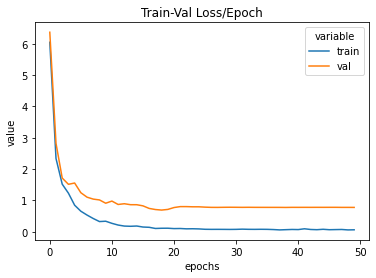

0.8699764236284278
Begin training.


Epoch 001: | Train Loss: 5.88166 | Val Loss: 6.31133
Epoch 002: | Train Loss: 2.23901 | Val Loss: 2.80951
Epoch 003: | Train Loss: 1.54301 | Val Loss: 1.92240
Epoch 004: | Train Loss: 1.25211 | Val Loss: 1.82280
Epoch 005: | Train Loss: 0.86717 | Val Loss: 1.98931
Epoch 006: | Train Loss: 0.71596 | Val Loss: 1.68555
Epoch 007: | Train Loss: 0.60468 | Val Loss: 1.50308
Epoch 008: | Train Loss: 0.42210 | Val Loss: 1.41687
Epoch 009: | Train Loss: 0.40756 | Val Loss: 1.34269
Epoch 010: | Train Loss: 0.32303 | Val Loss: 1.30063
Epoch 011: | Train Loss: 0.28825 | Val Loss: 1.04365
Epoch 012: | Train Loss: 0.26535 | Val Loss: 1.03997
Epoch 013: | Train Loss: 0.22900 | Val Loss: 0.98814
Epoch 014: | Train Loss: 0.21425 | Val Loss: 0.98813
Epoch 015: | Train Loss: 0.19247 | Val Loss: 0.99469
Epoch 016: | Train Loss: 0.14811 | Val Loss: 0.85102
Epoch 017: | Train Loss: 0.14953 | Val Loss: 0.85516
Epoch 018: | Train Loss: 0.14662 | Val Loss: 0.78440
Epoch 019: | Train Loss: 0.13508 | Val Loss: 0

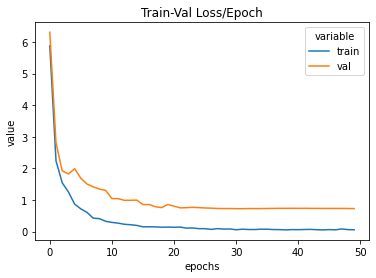

0.8701395405544267


In [55]:
LEARNING_RATE=0.001
from torch.optim.lr_scheduler import ReduceLROnPlateau
test_dataset = TestDataset(torch.from_numpy(X_test.values).float())
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE)
final_preds1=pd.DataFrame()
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=14)
qwe=0
for train_index, test_index in skf.split(X_train, y_train):
  loss_stats = {
    'train': [],
    "val": []
  }
  f1_stats=[]
  x_tt, x_tv = X_train.loc[train_index,:], X_train.loc[test_index,:]
  y_tt, y_tv = y_train[train_index], y_train[test_index]
  train_dataset = MoADataset(torch.from_numpy(x_tt.values).float(), torch.from_numpy(y_tt.values))
  val_dataset = MoADataset(torch.from_numpy(x_tv.values).float(), torch.from_numpy(y_tv.values))
  train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
  val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE)
  model = Model(num_features, num_targets, hidden_size)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  scheduler=ReduceLROnPlateau(optimizer, 'min',factor=0.3,patience=5)
  print("Begin training.")
  for e in tqdm(range(1, EPOCHS+1)):

    
      # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
      optimizer.zero_grad()
        
      y_train_pred = model(X_train_batch)
       
      train_loss = criterion(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
      val_epoch_loss = 0
      model.eval()
      for X_val_batch, y_val_batch in val_loader:
        y_val_pred = model(X_val_batch)
                        
        val_loss = criterion(y_val_pred, y_val_batch)
        
        scheduler.step(val_loss)
        val_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')
  train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
  sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')
  plt.show()  
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch,_  in val_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  print(f1_score(preds,y_tv.values , average='weighted'))
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch in test_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  final_preds1['preds'+str(qwe)]=pd.Series(preds)
  qwe+=1

Begin training.


Epoch 001: | Train Loss: 5.95464 | Val Loss: 6.37134
Epoch 002: | Train Loss: 2.29663 | Val Loss: 3.08458
Epoch 003: | Train Loss: 1.55311 | Val Loss: 2.03455
Epoch 004: | Train Loss: 1.28549 | Val Loss: 1.90658
Epoch 005: | Train Loss: 0.98010 | Val Loss: 1.96184
Epoch 006: | Train Loss: 0.71029 | Val Loss: 1.65021
Epoch 007: | Train Loss: 0.58117 | Val Loss: 1.52812
Epoch 008: | Train Loss: 0.42010 | Val Loss: 1.40814
Epoch 009: | Train Loss: 0.40091 | Val Loss: 1.36866
Epoch 010: | Train Loss: 0.33414 | Val Loss: 1.27644
Epoch 011: | Train Loss: 0.31415 | Val Loss: 1.14608
Epoch 012: | Train Loss: 0.23983 | Val Loss: 1.12471
Epoch 013: | Train Loss: 0.20468 | Val Loss: 1.13852
Epoch 014: | Train Loss: 0.20437 | Val Loss: 1.10337
Epoch 015: | Train Loss: 0.18184 | Val Loss: 1.06483
Epoch 016: | Train Loss: 0.16577 | Val Loss: 1.01106
Epoch 017: | Train Loss: 0.15342 | Val Loss: 0.95423
Epoch 018: | Train Loss: 0.12076 | Val Loss: 0.94164
Epoch 019: | Train Loss: 0.11814 | Val Loss: 0

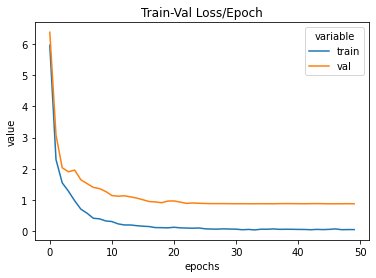

0.8823428108433413
Begin training.


Epoch 001: | Train Loss: 5.93749 | Val Loss: 6.41935
Epoch 002: | Train Loss: 2.25814 | Val Loss: 2.96938
Epoch 003: | Train Loss: 1.49906 | Val Loss: 2.02084
Epoch 004: | Train Loss: 1.24634 | Val Loss: 1.89715
Epoch 005: | Train Loss: 0.88011 | Val Loss: 1.93162
Epoch 006: | Train Loss: 0.63957 | Val Loss: 1.67305
Epoch 007: | Train Loss: 0.53679 | Val Loss: 1.53686
Epoch 008: | Train Loss: 0.43138 | Val Loss: 1.57340
Epoch 009: | Train Loss: 0.35386 | Val Loss: 1.56287
Epoch 010: | Train Loss: 0.34671 | Val Loss: 1.38037
Epoch 011: | Train Loss: 0.27594 | Val Loss: 1.22934
Epoch 012: | Train Loss: 0.26569 | Val Loss: 1.14605
Epoch 013: | Train Loss: 0.22010 | Val Loss: 1.10888
Epoch 014: | Train Loss: 0.18427 | Val Loss: 1.05117
Epoch 015: | Train Loss: 0.17414 | Val Loss: 0.97836
Epoch 016: | Train Loss: 0.15240 | Val Loss: 0.96927
Epoch 017: | Train Loss: 0.14542 | Val Loss: 0.94762
Epoch 018: | Train Loss: 0.13281 | Val Loss: 0.87051
Epoch 019: | Train Loss: 0.13482 | Val Loss: 0

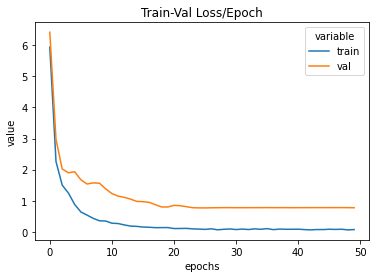

0.8821629104614284
Begin training.


Epoch 001: | Train Loss: 5.92825 | Val Loss: 6.24056
Epoch 002: | Train Loss: 2.30535 | Val Loss: 2.69356
Epoch 003: | Train Loss: 1.62536 | Val Loss: 1.95863
Epoch 004: | Train Loss: 1.17456 | Val Loss: 1.99197
Epoch 005: | Train Loss: 0.92596 | Val Loss: 2.05455
Epoch 006: | Train Loss: 0.68784 | Val Loss: 1.90913
Epoch 007: | Train Loss: 0.54234 | Val Loss: 1.80684
Epoch 008: | Train Loss: 0.50749 | Val Loss: 1.59460
Epoch 009: | Train Loss: 0.36544 | Val Loss: 1.49893
Epoch 010: | Train Loss: 0.34875 | Val Loss: 1.44819
Epoch 011: | Train Loss: 0.26660 | Val Loss: 1.40338
Epoch 012: | Train Loss: 0.24082 | Val Loss: 1.34291
Epoch 013: | Train Loss: 0.21363 | Val Loss: 1.28303
Epoch 014: | Train Loss: 0.21698 | Val Loss: 1.24157
Epoch 015: | Train Loss: 0.19376 | Val Loss: 1.15300
Epoch 016: | Train Loss: 0.17369 | Val Loss: 1.06484
Epoch 017: | Train Loss: 0.15927 | Val Loss: 1.08751
Epoch 018: | Train Loss: 0.12221 | Val Loss: 1.11639
Epoch 019: | Train Loss: 0.13339 | Val Loss: 1

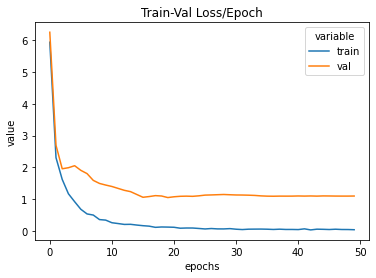

0.8761641840095158
Begin training.


Epoch 001: | Train Loss: 5.92688 | Val Loss: 6.34273
Epoch 002: | Train Loss: 2.28724 | Val Loss: 2.86306
Epoch 003: | Train Loss: 1.54137 | Val Loss: 1.71833
Epoch 004: | Train Loss: 1.10671 | Val Loss: 1.62572
Epoch 005: | Train Loss: 0.94708 | Val Loss: 1.61513
Epoch 006: | Train Loss: 0.68510 | Val Loss: 1.29040
Epoch 007: | Train Loss: 0.58336 | Val Loss: 1.18247
Epoch 008: | Train Loss: 0.44224 | Val Loss: 1.07866
Epoch 009: | Train Loss: 0.39587 | Val Loss: 0.88568
Epoch 010: | Train Loss: 0.30183 | Val Loss: 0.85248
Epoch 011: | Train Loss: 0.24803 | Val Loss: 0.87451
Epoch 012: | Train Loss: 0.25153 | Val Loss: 0.73518
Epoch 013: | Train Loss: 0.18493 | Val Loss: 0.66286
Epoch 014: | Train Loss: 0.18405 | Val Loss: 0.71606
Epoch 015: | Train Loss: 0.16330 | Val Loss: 0.71933
Epoch 016: | Train Loss: 0.15569 | Val Loss: 0.71535
Epoch 017: | Train Loss: 0.13541 | Val Loss: 0.70993
Epoch 018: | Train Loss: 0.13718 | Val Loss: 0.70906
Epoch 019: | Train Loss: 0.14321 | Val Loss: 0

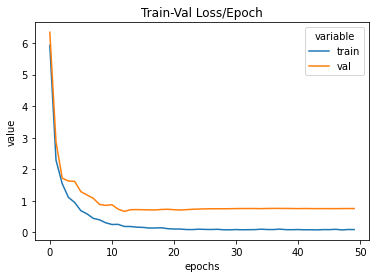

0.8675372426529331
Begin training.


Epoch 001: | Train Loss: 5.89123 | Val Loss: 6.34576
Epoch 002: | Train Loss: 2.29581 | Val Loss: 2.96273
Epoch 003: | Train Loss: 1.51987 | Val Loss: 1.87577
Epoch 004: | Train Loss: 1.15001 | Val Loss: 1.92597
Epoch 005: | Train Loss: 0.89413 | Val Loss: 1.94882
Epoch 006: | Train Loss: 0.73523 | Val Loss: 1.76854
Epoch 007: | Train Loss: 0.55061 | Val Loss: 1.71973
Epoch 008: | Train Loss: 0.49316 | Val Loss: 1.58662
Epoch 009: | Train Loss: 0.38685 | Val Loss: 1.51913
Epoch 010: | Train Loss: 0.34000 | Val Loss: 1.41036
Epoch 011: | Train Loss: 0.29139 | Val Loss: 1.25210
Epoch 012: | Train Loss: 0.24337 | Val Loss: 1.12412
Epoch 013: | Train Loss: 0.22134 | Val Loss: 1.02964
Epoch 014: | Train Loss: 0.19647 | Val Loss: 0.96316
Epoch 015: | Train Loss: 0.16365 | Val Loss: 0.94812
Epoch 016: | Train Loss: 0.15713 | Val Loss: 1.00511
Epoch 017: | Train Loss: 0.15091 | Val Loss: 0.97798
Epoch 018: | Train Loss: 0.13244 | Val Loss: 0.90440
Epoch 019: | Train Loss: 0.11758 | Val Loss: 0

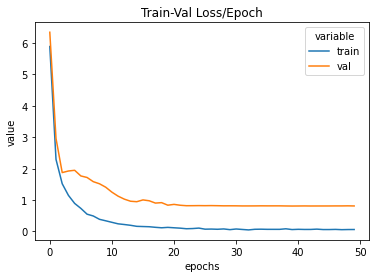

0.8730256278664817


In [56]:
LEARNING_RATE=0.001
from torch.optim.lr_scheduler import ReduceLROnPlateau
test_dataset = TestDataset(torch.from_numpy(X_test.values).float())
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE)
final_preds2=pd.DataFrame()
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=28)
qwe=0
for train_index, test_index in skf.split(X_train, y_train):
  loss_stats = {
    'train': [],
    "val": []
  }
  f1_stats=[]
  x_tt, x_tv = X_train.loc[train_index,:], X_train.loc[test_index,:]
  y_tt, y_tv = y_train[train_index], y_train[test_index]
  train_dataset = MoADataset(torch.from_numpy(x_tt.values).float(), torch.from_numpy(y_tt.values))
  val_dataset = MoADataset(torch.from_numpy(x_tv.values).float(), torch.from_numpy(y_tv.values))
  train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
  val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE)
  model = Model(num_features, num_targets, hidden_size)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  scheduler=ReduceLROnPlateau(optimizer, 'min',factor=0.3,patience=5)
  print("Begin training.")
  for e in tqdm(range(1, EPOCHS+1)):

    
      # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
      optimizer.zero_grad()
        
      y_train_pred = model(X_train_batch)
       
      train_loss = criterion(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
      val_epoch_loss = 0
      model.eval()
      for X_val_batch, y_val_batch in val_loader:
        y_val_pred = model(X_val_batch)
                        
        val_loss = criterion(y_val_pred, y_val_batch)
        
        scheduler.step(val_loss)
        val_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')
  train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
  sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')
  plt.show()  
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch,_  in val_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  print(f1_score(preds,y_tv.values , average='weighted'))
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch in test_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  final_preds2['preds'+str(qwe)]=pd.Series(preds)
  qwe+=1

Begin training.


Epoch 001: | Train Loss: 5.94538 | Val Loss: 6.40650
Epoch 002: | Train Loss: 2.34027 | Val Loss: 3.11328
Epoch 003: | Train Loss: 1.61056 | Val Loss: 2.18360
Epoch 004: | Train Loss: 1.23924 | Val Loss: 2.03254
Epoch 005: | Train Loss: 1.02233 | Val Loss: 2.06767
Epoch 006: | Train Loss: 0.67648 | Val Loss: 1.79263
Epoch 007: | Train Loss: 0.57088 | Val Loss: 1.60328
Epoch 008: | Train Loss: 0.48905 | Val Loss: 1.43253
Epoch 009: | Train Loss: 0.38735 | Val Loss: 1.34705
Epoch 010: | Train Loss: 0.30564 | Val Loss: 1.28110
Epoch 011: | Train Loss: 0.25148 | Val Loss: 1.19001
Epoch 012: | Train Loss: 0.25219 | Val Loss: 1.11654
Epoch 013: | Train Loss: 0.22639 | Val Loss: 1.09443
Epoch 014: | Train Loss: 0.16800 | Val Loss: 1.06561
Epoch 015: | Train Loss: 0.18610 | Val Loss: 0.99983
Epoch 016: | Train Loss: 0.15739 | Val Loss: 0.94752
Epoch 017: | Train Loss: 0.14227 | Val Loss: 0.91835
Epoch 018: | Train Loss: 0.14278 | Val Loss: 0.86775
Epoch 019: | Train Loss: 0.12423 | Val Loss: 0

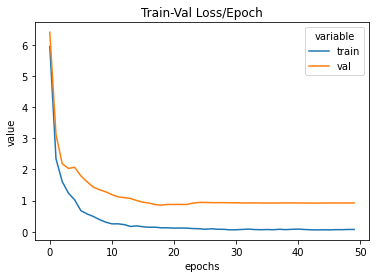

0.8875666424269537
Begin training.


Epoch 001: | Train Loss: 6.00174 | Val Loss: 6.44211
Epoch 002: | Train Loss: 2.27402 | Val Loss: 2.97570
Epoch 003: | Train Loss: 1.51075 | Val Loss: 2.03029
Epoch 004: | Train Loss: 1.23694 | Val Loss: 1.82618
Epoch 005: | Train Loss: 0.89839 | Val Loss: 1.93411
Epoch 006: | Train Loss: 0.63268 | Val Loss: 1.76716
Epoch 007: | Train Loss: 0.49460 | Val Loss: 1.68698
Epoch 008: | Train Loss: 0.47177 | Val Loss: 1.61069
Epoch 009: | Train Loss: 0.36604 | Val Loss: 1.48773
Epoch 010: | Train Loss: 0.32446 | Val Loss: 1.38975
Epoch 011: | Train Loss: 0.27763 | Val Loss: 1.25251
Epoch 012: | Train Loss: 0.24073 | Val Loss: 1.17822
Epoch 013: | Train Loss: 0.19380 | Val Loss: 1.16072
Epoch 014: | Train Loss: 0.22177 | Val Loss: 1.10467
Epoch 015: | Train Loss: 0.14783 | Val Loss: 0.99264
Epoch 016: | Train Loss: 0.19648 | Val Loss: 0.97017
Epoch 017: | Train Loss: 0.16036 | Val Loss: 0.94801
Epoch 018: | Train Loss: 0.17584 | Val Loss: 0.84239
Epoch 019: | Train Loss: 0.11671 | Val Loss: 0

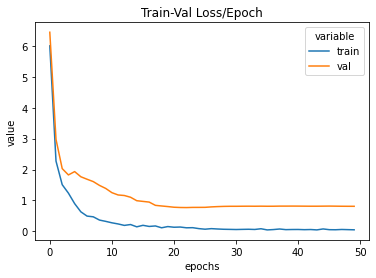

0.8801547069258011
Begin training.


Epoch 001: | Train Loss: 5.92220 | Val Loss: 6.29064
Epoch 002: | Train Loss: 2.27387 | Val Loss: 2.71703
Epoch 003: | Train Loss: 1.44622 | Val Loss: 1.94480
Epoch 004: | Train Loss: 1.15785 | Val Loss: 2.00116
Epoch 005: | Train Loss: 0.96315 | Val Loss: 2.07403
Epoch 006: | Train Loss: 0.70513 | Val Loss: 1.90207
Epoch 007: | Train Loss: 0.59175 | Val Loss: 1.70226
Epoch 008: | Train Loss: 0.48320 | Val Loss: 1.61381
Epoch 009: | Train Loss: 0.35254 | Val Loss: 1.57095
Epoch 010: | Train Loss: 0.30013 | Val Loss: 1.49700
Epoch 011: | Train Loss: 0.25973 | Val Loss: 1.37789
Epoch 012: | Train Loss: 0.23324 | Val Loss: 1.24813
Epoch 013: | Train Loss: 0.22249 | Val Loss: 1.18831
Epoch 014: | Train Loss: 0.15962 | Val Loss: 1.16478
Epoch 015: | Train Loss: 0.16847 | Val Loss: 1.16345
Epoch 016: | Train Loss: 0.15500 | Val Loss: 1.18194
Epoch 017: | Train Loss: 0.16419 | Val Loss: 1.16390
Epoch 018: | Train Loss: 0.12324 | Val Loss: 1.13172
Epoch 019: | Train Loss: 0.14845 | Val Loss: 1

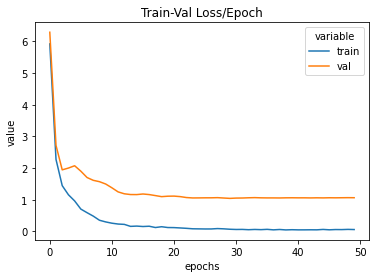

0.8692882994519505
Begin training.


Epoch 001: | Train Loss: 5.96149 | Val Loss: 6.38920
Epoch 002: | Train Loss: 2.27483 | Val Loss: 2.72465
Epoch 003: | Train Loss: 1.52776 | Val Loss: 1.67686
Epoch 004: | Train Loss: 1.18614 | Val Loss: 1.53081
Epoch 005: | Train Loss: 0.92379 | Val Loss: 1.45388
Epoch 006: | Train Loss: 0.71597 | Val Loss: 1.31977
Epoch 007: | Train Loss: 0.54716 | Val Loss: 1.10844
Epoch 008: | Train Loss: 0.41557 | Val Loss: 0.98200
Epoch 009: | Train Loss: 0.35351 | Val Loss: 0.91782
Epoch 010: | Train Loss: 0.33062 | Val Loss: 0.82795
Epoch 011: | Train Loss: 0.27508 | Val Loss: 0.81390
Epoch 012: | Train Loss: 0.25959 | Val Loss: 0.84806
Epoch 013: | Train Loss: 0.22032 | Val Loss: 0.76982
Epoch 014: | Train Loss: 0.19844 | Val Loss: 0.74300
Epoch 015: | Train Loss: 0.19877 | Val Loss: 0.72232
Epoch 016: | Train Loss: 0.17419 | Val Loss: 0.69835
Epoch 017: | Train Loss: 0.16164 | Val Loss: 0.67166
Epoch 018: | Train Loss: 0.12600 | Val Loss: 0.66414
Epoch 019: | Train Loss: 0.13392 | Val Loss: 0

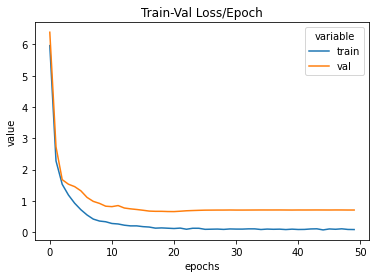

0.8660544640488061
Begin training.


Epoch 001: | Train Loss: 5.97088 | Val Loss: 6.34088
Epoch 002: | Train Loss: 2.26940 | Val Loss: 2.70606
Epoch 003: | Train Loss: 1.54853 | Val Loss: 1.89523
Epoch 004: | Train Loss: 1.18713 | Val Loss: 1.73008
Epoch 005: | Train Loss: 0.95413 | Val Loss: 1.83069
Epoch 006: | Train Loss: 0.72243 | Val Loss: 1.76934
Epoch 007: | Train Loss: 0.60328 | Val Loss: 1.62918
Epoch 008: | Train Loss: 0.48133 | Val Loss: 1.52102
Epoch 009: | Train Loss: 0.38501 | Val Loss: 1.32782
Epoch 010: | Train Loss: 0.32462 | Val Loss: 1.29932
Epoch 011: | Train Loss: 0.29634 | Val Loss: 1.27749
Epoch 012: | Train Loss: 0.25858 | Val Loss: 1.19720
Epoch 013: | Train Loss: 0.18930 | Val Loss: 1.20175
Epoch 014: | Train Loss: 0.20866 | Val Loss: 1.06929
Epoch 015: | Train Loss: 0.20255 | Val Loss: 0.95726
Epoch 016: | Train Loss: 0.19200 | Val Loss: 0.81027
Epoch 017: | Train Loss: 0.15324 | Val Loss: 0.86530
Epoch 018: | Train Loss: 0.11101 | Val Loss: 0.83964
Epoch 019: | Train Loss: 0.12859 | Val Loss: 0

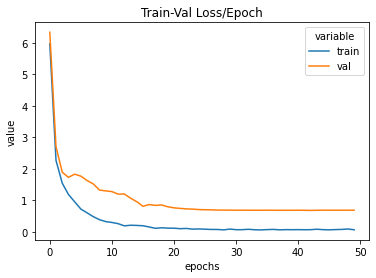

0.8662977835691216


In [57]:
LEARNING_RATE=0.001
from torch.optim.lr_scheduler import ReduceLROnPlateau
test_dataset = TestDataset(torch.from_numpy(X_test.values).float())
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE)
final_preds3=pd.DataFrame()
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=96)
qwe=0
for train_index, test_index in skf.split(X_train, y_train):
  loss_stats = {
    'train': [],
    "val": []
  }
  f1_stats=[]
  x_tt, x_tv = X_train.loc[train_index,:], X_train.loc[test_index,:]
  y_tt, y_tv = y_train[train_index], y_train[test_index]
  train_dataset = MoADataset(torch.from_numpy(x_tt.values).float(), torch.from_numpy(y_tt.values))
  val_dataset = MoADataset(torch.from_numpy(x_tv.values).float(), torch.from_numpy(y_tv.values))
  train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
  val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE)
  model = Model(num_features, num_targets, hidden_size)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  scheduler=ReduceLROnPlateau(optimizer, 'min',factor=0.3,patience=5)
  print("Begin training.")
  for e in tqdm(range(1, EPOCHS+1)):

    
      # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
      optimizer.zero_grad()
        
      y_train_pred = model(X_train_batch)
       
      train_loss = criterion(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
      val_epoch_loss = 0
      model.eval()
      for X_val_batch, y_val_batch in val_loader:
        y_val_pred = model(X_val_batch)
                        
        val_loss = criterion(y_val_pred, y_val_batch)
        
        scheduler.step(val_loss)
        val_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')
  train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
  sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')
  plt.show()  
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch,_  in val_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  print(f1_score(preds,y_tv.values , average='weighted'))
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch in test_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  final_preds3['preds'+str(qwe)]=pd.Series(preds)
  qwe+=1

Begin training.


Epoch 001: | Train Loss: 5.93137 | Val Loss: 6.38382
Epoch 002: | Train Loss: 2.31109 | Val Loss: 3.11840
Epoch 003: | Train Loss: 1.48853 | Val Loss: 2.11630
Epoch 004: | Train Loss: 1.25535 | Val Loss: 2.00442
Epoch 005: | Train Loss: 0.93573 | Val Loss: 2.02769
Epoch 006: | Train Loss: 0.66106 | Val Loss: 1.68116
Epoch 007: | Train Loss: 0.52468 | Val Loss: 1.65336
Epoch 008: | Train Loss: 0.46759 | Val Loss: 1.44129
Epoch 009: | Train Loss: 0.34454 | Val Loss: 1.41979
Epoch 010: | Train Loss: 0.31665 | Val Loss: 1.34447
Epoch 011: | Train Loss: 0.26666 | Val Loss: 1.29042
Epoch 012: | Train Loss: 0.27268 | Val Loss: 1.12306
Epoch 013: | Train Loss: 0.22086 | Val Loss: 1.06242
Epoch 014: | Train Loss: 0.19918 | Val Loss: 1.06733
Epoch 015: | Train Loss: 0.17545 | Val Loss: 1.10576
Epoch 016: | Train Loss: 0.16132 | Val Loss: 1.04045
Epoch 017: | Train Loss: 0.13695 | Val Loss: 1.03166
Epoch 018: | Train Loss: 0.15780 | Val Loss: 1.04651
Epoch 019: | Train Loss: 0.12011 | Val Loss: 1

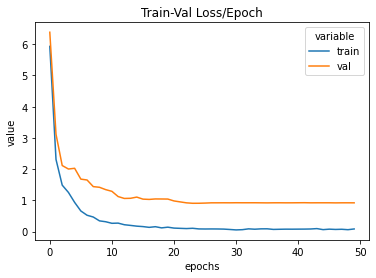

0.881076554957656
Begin training.


Epoch 001: | Train Loss: 6.05859 | Val Loss: 6.46276
Epoch 002: | Train Loss: 2.34589 | Val Loss: 2.91113
Epoch 003: | Train Loss: 1.48687 | Val Loss: 1.98031
Epoch 004: | Train Loss: 1.27123 | Val Loss: 1.80918
Epoch 005: | Train Loss: 0.92136 | Val Loss: 1.88306
Epoch 006: | Train Loss: 0.73416 | Val Loss: 1.64151
Epoch 007: | Train Loss: 0.63540 | Val Loss: 1.55527
Epoch 008: | Train Loss: 0.48892 | Val Loss: 1.53389
Epoch 009: | Train Loss: 0.40855 | Val Loss: 1.45362
Epoch 010: | Train Loss: 0.33273 | Val Loss: 1.34479
Epoch 011: | Train Loss: 0.30105 | Val Loss: 1.24356
Epoch 012: | Train Loss: 0.23204 | Val Loss: 1.13225
Epoch 013: | Train Loss: 0.20865 | Val Loss: 0.99852
Epoch 014: | Train Loss: 0.18051 | Val Loss: 0.97745
Epoch 015: | Train Loss: 0.17283 | Val Loss: 0.93143
Epoch 016: | Train Loss: 0.17255 | Val Loss: 0.89941
Epoch 017: | Train Loss: 0.15945 | Val Loss: 0.86386
Epoch 018: | Train Loss: 0.16328 | Val Loss: 0.85417
Epoch 019: | Train Loss: 0.12787 | Val Loss: 0

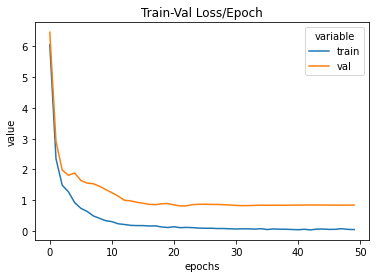

0.8811954480227212
Begin training.


Epoch 001: | Train Loss: 5.86707 | Val Loss: 6.32645
Epoch 002: | Train Loss: 2.23686 | Val Loss: 2.81216
Epoch 003: | Train Loss: 1.54369 | Val Loss: 1.97467
Epoch 004: | Train Loss: 1.19654 | Val Loss: 1.95477
Epoch 005: | Train Loss: 0.87244 | Val Loss: 2.08000
Epoch 006: | Train Loss: 0.65902 | Val Loss: 1.95944
Epoch 007: | Train Loss: 0.51859 | Val Loss: 1.68693
Epoch 008: | Train Loss: 0.47421 | Val Loss: 1.61081
Epoch 009: | Train Loss: 0.40094 | Val Loss: 1.55075
Epoch 010: | Train Loss: 0.32589 | Val Loss: 1.43485
Epoch 011: | Train Loss: 0.25919 | Val Loss: 1.35785
Epoch 012: | Train Loss: 0.24380 | Val Loss: 1.30057
Epoch 013: | Train Loss: 0.22173 | Val Loss: 1.25695
Epoch 014: | Train Loss: 0.20219 | Val Loss: 1.22870
Epoch 015: | Train Loss: 0.16810 | Val Loss: 1.22363
Epoch 016: | Train Loss: 0.17096 | Val Loss: 1.19204
Epoch 017: | Train Loss: 0.14479 | Val Loss: 1.14830
Epoch 018: | Train Loss: 0.12942 | Val Loss: 1.14058
Epoch 019: | Train Loss: 0.13802 | Val Loss: 1

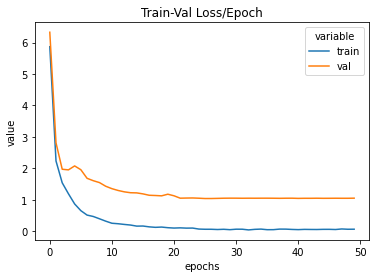

0.867237297483887
Begin training.


Epoch 001: | Train Loss: 5.84103 | Val Loss: 6.27024
Epoch 002: | Train Loss: 2.28735 | Val Loss: 2.83305
Epoch 003: | Train Loss: 1.48092 | Val Loss: 1.77625
Epoch 004: | Train Loss: 1.17713 | Val Loss: 1.59229
Epoch 005: | Train Loss: 0.89332 | Val Loss: 1.62582
Epoch 006: | Train Loss: 0.73273 | Val Loss: 1.26237
Epoch 007: | Train Loss: 0.53418 | Val Loss: 1.03535
Epoch 008: | Train Loss: 0.46157 | Val Loss: 0.99534
Epoch 009: | Train Loss: 0.36952 | Val Loss: 1.05498
Epoch 010: | Train Loss: 0.32743 | Val Loss: 0.97960
Epoch 011: | Train Loss: 0.26507 | Val Loss: 0.94245
Epoch 012: | Train Loss: 0.23943 | Val Loss: 0.87155
Epoch 013: | Train Loss: 0.20934 | Val Loss: 0.73498
Epoch 014: | Train Loss: 0.14917 | Val Loss: 0.66921
Epoch 015: | Train Loss: 0.17209 | Val Loss: 0.69059
Epoch 016: | Train Loss: 0.14362 | Val Loss: 0.67477
Epoch 017: | Train Loss: 0.14776 | Val Loss: 0.67328
Epoch 018: | Train Loss: 0.15885 | Val Loss: 0.68707
Epoch 019: | Train Loss: 0.13330 | Val Loss: 0

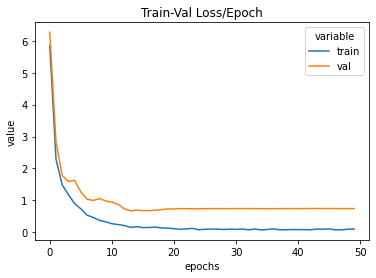

0.8478455669011111
Begin training.


Epoch 001: | Train Loss: 5.76907 | Val Loss: 6.14348
Epoch 002: | Train Loss: 2.27636 | Val Loss: 2.70259
Epoch 003: | Train Loss: 1.51047 | Val Loss: 2.06015
Epoch 004: | Train Loss: 1.22897 | Val Loss: 1.83020
Epoch 005: | Train Loss: 0.87181 | Val Loss: 1.86418
Epoch 006: | Train Loss: 0.73284 | Val Loss: 1.49562
Epoch 007: | Train Loss: 0.51828 | Val Loss: 1.49588
Epoch 008: | Train Loss: 0.48184 | Val Loss: 1.37065
Epoch 009: | Train Loss: 0.40218 | Val Loss: 1.30106
Epoch 010: | Train Loss: 0.34055 | Val Loss: 1.18947
Epoch 011: | Train Loss: 0.26543 | Val Loss: 1.16527
Epoch 012: | Train Loss: 0.22440 | Val Loss: 1.09744
Epoch 013: | Train Loss: 0.20823 | Val Loss: 0.98579
Epoch 014: | Train Loss: 0.16456 | Val Loss: 0.91056
Epoch 015: | Train Loss: 0.16645 | Val Loss: 0.86774
Epoch 016: | Train Loss: 0.18565 | Val Loss: 0.84629
Epoch 017: | Train Loss: 0.18104 | Val Loss: 0.77184
Epoch 018: | Train Loss: 0.14734 | Val Loss: 0.82898
Epoch 019: | Train Loss: 0.12206 | Val Loss: 0

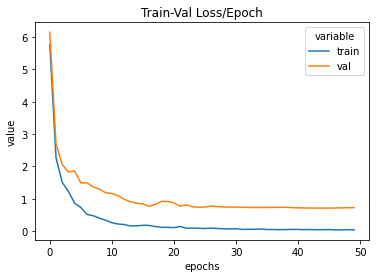

0.8752848198671724


In [60]:
LEARNING_RATE=0.001
from torch.optim.lr_scheduler import ReduceLROnPlateau
test_dataset = TestDataset(torch.from_numpy(X_test.values).float())
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE)
final_preds4=pd.DataFrame()
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=666)
qwe=0
for train_index, test_index in skf.split(X_train, y_train):
  loss_stats = {
    'train': [],
    "val": []
  }
  f1_stats=[]
  x_tt, x_tv = X_train.loc[train_index,:], X_train.loc[test_index,:]
  y_tt, y_tv = y_train[train_index], y_train[test_index]
  train_dataset = MoADataset(torch.from_numpy(x_tt.values).float(), torch.from_numpy(y_tt.values))
  val_dataset = MoADataset(torch.from_numpy(x_tv.values).float(), torch.from_numpy(y_tv.values))
  train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
  val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE)
  model = Model(num_features, num_targets, hidden_size)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  scheduler=ReduceLROnPlateau(optimizer, 'min',factor=0.3,patience=5)
  print("Begin training.")
  for e in tqdm(range(1, EPOCHS+1)):

    
      # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
      optimizer.zero_grad()
        
      y_train_pred = model(X_train_batch)
       
      train_loss = criterion(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
      val_epoch_loss = 0
      model.eval()
      for X_val_batch, y_val_batch in val_loader:
        y_val_pred = model(X_val_batch)
                        
        val_loss = criterion(y_val_pred, y_val_batch)
        
        scheduler.step(val_loss)
        val_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')
  train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
  sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')
  plt.show()  
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch,_  in val_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  print(f1_score(preds,y_tv.values , average='weighted'))
  y_pred_list = []
  y_pred_1_list = []

  with torch.no_grad():
    model.eval()
    for X_batch in test_loader:
      X_batch = X_batch
      y_test_pred = model(X_batch)
      y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
      _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
      y_pred_1_list.append(y_pred_tags.numpy())
  preds=[]
  for i in y_pred_1_list:
    for j in i:
      preds.append(j)
  final_preds4['preds'+str(qwe)]=pd.Series(preds)
  qwe+=1

In [61]:
new_final=pd.concat([final_preds.drop('final',axis=1),final_preds1,final_preds2,final_preds3,final_preds4],axis=1)

In [67]:
preds=[]
check_it=[]
for i in range(len(new_final)):
    preds.append(new_final.drop('final',axis=1).loc[i].value_counts().index.tolist()[0])
    print(new_final.drop('final',axis=1).loc[i].value_counts())
    #try:
    #    if preds.loc[i].value_counts()[:1].

3     18
7      6
13     1
Name: 0, dtype: int64
11    23
12     1
3      1
Name: 1, dtype: int64
15    8
6     7
2     6
11    4
Name: 2, dtype: int64
6     19
2      5
15     1
Name: 3, dtype: int64
3    25
Name: 4, dtype: int64
3    25
Name: 5, dtype: int64
9     14
15     7
16     1
7      1
6      1
4      1
Name: 6, dtype: int64
7     9
4     8
12    4
8     4
Name: 7, dtype: int64
20    18
6      7
Name: 8, dtype: int64
3    24
9     1
Name: 9, dtype: int64
3    25
Name: 10, dtype: int64
2     19
6      4
15     2
Name: 11, dtype: int64
3    25
Name: 12, dtype: int64
8    22
4     2
7     1
Name: 13, dtype: int64
8    25
Name: 14, dtype: int64
8    25
Name: 15, dtype: int64
3    25
Name: 16, dtype: int64
2     18
6      5
15     2
Name: 17, dtype: int64
4    13
0     6
7     5
3     1
Name: 18, dtype: int64
3     17
4      6
20     1
2      1
Name: 19, dtype: int64
3     20
12     5
Name: 20, dtype: int64
6    15
4     4
2     4
7     2
Name: 21, dtype: int64
2    14
6     8
3  

In [63]:
new_final['final']=pd.Series(preds)+1

In [64]:
new_final

,preds0,preds1,preds2,preds3,preds4,preds0,preds1,preds2,preds3,preds4,preds0,preds1,preds2,preds3,preds4,preds0,preds1,preds2,preds3,preds4,preds0,preds1,preds2,preds3,preds4,final
0,3,7,3,3,3,13,3,3,3,7,3,3,3,3,3,3,3,7,7,7,3,3,3,3,7,4
1,11,11,11,3,11,11,12,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12
2,15,15,6,6,15,15,15,2,6,15,2,2,15,6,15,2,6,2,2,11,11,11,6,6,11,16
3,2,6,6,6,6,2,6,6,6,6,2,6,6,6,6,6,15,2,2,6,6,6,6,6,6,7
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,9,9,10
935,6,15,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,9,20,6,7
936,2,6,2,6,6,6,6,6,2,2,2,2,2,2,6,6,6,6,6,2,2,6,6,2,2,7
937,13,11,11,13,13,10,11,11,11,11,13,13,11,11,13,13,11,11,13,11,11,13,11,11,13,12


In [68]:
new_final['final'].to_csv('torch_pca_final.csv',index=False)